In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### read in csv into dataframe

In [2]:
# Read the csv file into a pandas DataFrame
lsd = pd.read_csv('data/lsd.csv')
lsd.head()

,tc,score
0,1.17,78.93
1,2.97,58.20
2,3.26,67.47
3,4.69,37.47
4,5.83,45.65


### reshape values into ndarray

In [3]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = lsd.tc.values.reshape(-1, 1)
y = lsd.score.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (7, 1) (7, 1)


array([[1.17],
       [2.97],
       [3.26],
       [4.69],
       [5.83],
       [6.  ],
       [6.41]])

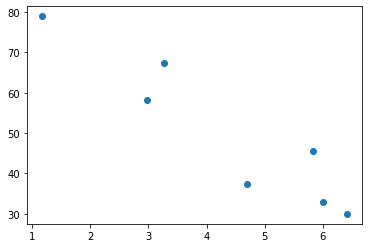

In [4]:
plt.scatter(X, y)

### linear regression model build

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [6]:
model.fit(X, y)

LinearRegression()

In [7]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[-9.00946642]]
y-axis intercept:  [89.12387377]


In [8]:
print(X.min(), X.max())

1.17 6.41


## notice sklearnx requers X value must be in the same format as coefficient as 2d array

In [9]:
# notice x value must be in the same format as coefficient or the X shape
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[1.17]]
Max X Value: [[6.41]]


In [10]:
y_min = model.predict(x_min)
y_max = model.predict(x_max)

In [11]:
print(x_min, y_min)

[[1.17]] [[78.58279806]]


In [12]:
print(x_min[0], y_min[0])

[1.17] [78.58279806]


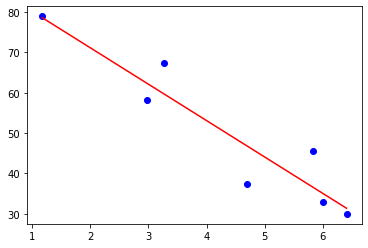

In [13]:
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

## Model quantify by mse and r2, r2 around 1 is better result

### MSE = Mean Squared Error, R2 Score is the default scoring for many of the Sklearn models

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 36.26876125852443
R-squared (R2 ): 0.8778349707775889


### Overall score = r2 for the model

In [15]:
# Overall Score = R2 for the model
model.score(X, y)

0.8778349707775889